In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Investigating different datasets to use:

In [5]:
health = pd.read_csv('Behavioral_Risk_Factor_Data__Health-Related_Quality_of_Life__HRQOL_.csv')

health.head()
health.columns

Index([u'Year', u'LocationAbbr', u'LocationDesc', u'Category', u'Topic',
       u'Question', u'DataSource', u'Data_Value_Unit', u'Data_Value_Type',
       u'Data_Value', u'Data_Value_Footnote_Symbol', u'Data_Value_Footnote',
       u'Data_Value_Std_Err', u'Low_Confidence_Limit',
       u'High_Confidence_Limit', u'Sample_Size', u'Break_Out',
       u'Break_Out_Category', u'GeoLocation', u'CategoryId', u'TopicId',
       u'QuestionId', u'LocationId', u'BreakOutId', u'BreakOutCategoryid'],
      dtype='object')

In [7]:
prev = pd.read_csv('Behavioral_Risk_Factor_Surveillance_System__BRFSS__Prevalence_Data__2011_to_present_.csv')

prev.head()
prev.columns

Index([u'Year', u'Locationabbr', u'Locationdesc', u'Class', u'Topic',
       u'Question', u'Response', u'Break_Out', u'Break_Out_Category',
       u'Sample_Size', u'Data_value', u'Confidence_limit_Low',
       u'Confidence_limit_High', u'Display_order', u'Data_value_unit',
       u'Data_value_type', u'Data_Value_Footnote_Symbol',
       u'Data_Value_Footnote', u'DataSource', u'ClassId', u'TopicId',
       u'LocationID', u'BreakoutID', u'BreakOutCategoryID', u'QuestionID',
       u'ResponseID', u'GeoLocation'],
      dtype='object')

In [8]:
prev.Question.value_counts()

What is your employment status?                                                                                          28946
What is your marital status?                                                                                             21761
How many children live in your household?                                                                                21611
How is your general health?                                                                                              18260
What is your age?                                                                                                        17172
What is your annual household income?                                                                                    15104
What is your race/ethnicity?                                                                                             15035
Four Level Smoking Status                                                                                      

In [9]:
slq = pandas.read_csv('SLQ_H.csv')

slq.head()

,Unnamed: 0,seqn,sld010h,slq050,slq060
0,1,73557,7,1,2
1,2,73558,9,2,2
2,3,73559,8,2,2
3,4,73561,9,2,2
4,5,73562,5,2,1


Uhh yeah we don't know what that is

In [34]:
b = pd.read_csv('brfss2014.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
b = b[:10000]
b.head()
b = b[b.children != 88]
b = b[b.children != 89]
b = b[b.children != 99]
b = b[b.sleptim1 != 77]
b = b[b.sleptim1 != 99]
b = b[b.marital != 9]
b = b[b.employ1 != 9]
b = b[b.income2 != 77]
b = b[b.income2 != 99]
b = b[b.weight2 != 9999]
b = b[b.useequip != 7]
b = b[b.useequip != 9]

,Unnamed: 0,x.state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,x.psu,...,x.fobtfs,x.crcrec,x.aidtst3,x.impeduc,x.impmrtl,x.imphome,rcsbrac1,rcsrace1,rchisla1,rcsbirth
0,1,1,1,1172014,1,17,2014,1100,2014000001,2014000001,...,2,1,2,5,1,1,NaN,NaN,NaN,NaN
1,2,1,1,1072014,1,7,2014,1100,2014000002,2014000002,...,2,2,2,4,1,1,NaN,NaN,NaN,NaN
2,3,1,1,1092014,1,9,2014,1100,2014000003,2014000003,...,2,2,2,6,1,1,NaN,NaN,NaN,NaN
3,4,1,1,1072014,1,7,2014,1100,2014000004,2014000004,...,2,1,2,6,3,1,NaN,NaN,NaN,NaN
4,5,1,1,1162014,1,16,2014,1100,2014000005,2014000005,...,2,1,2,5,1,1,NaN,NaN,NaN,NaN


In [35]:
print "Number of rows:", len(b)
print "Number of columns:", len(b.columns)
print b.columns

Number of rows: 464664
Number of columns: 280
Index([u'Unnamed: 0', u'x.state', u'fmonth', u'idate', u'imonth', u'iday',
       u'iyear', u'dispcode', u'seqno', u'x.psu',
       ...
       u'x.fobtfs', u'x.crcrec', u'x.aidtst3', u'x.impeduc', u'x.impmrtl',
       u'x.imphome', u'rcsbrac1', u'rcsrace1', u'rchisla1', u'rcsbirth'],
      dtype='object', length=280)


Get rid of the special codes 77 and 99 in the sleep time column

In [36]:
print b['sleptim1'].mean()
b = b[b.sleptim1 != 77]
b = b[b.sleptim1 != 99]
print b['sleptim1'].mean()

8.07833186991
7.0655037846


The website says that the data should include questions about snoring and how often they feel tired during the day, but we could not find the column id for those. We will look into this further in the future.

These are the relevant rows that we'll be looking at:

In [51]:
sleptim = b['sleptim1']
marital = b['marital']
children = b['children']
employ = b['employ1']
income = b['income2']
weight = b['weight2']
height = b['height3']
sex = b['sex']
useequip = b['useequip']
age = b['x.ageg5yr']

Plot value count graphs:

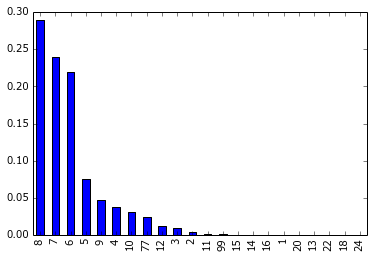

In [37]:
sleptim.value_counts(normalize=True).plot(kind='bar')

It seems like most people get 6-8 hours of sleep a night.

In [41]:
print "               Normal Average Sleep:", sleptim.mean()
print "    Average Sleep of Married People:", sleptim[b['marital'] == 1].mean()
print "Average Sleep of Non-Married People:", sleptim[b['marital'] != 1].mean()

               Normal Average Sleep: 7.0655037846
    Average Sleep of Married People: 7.09662438993
Average Sleep of Non-Married People: 7.02972034535


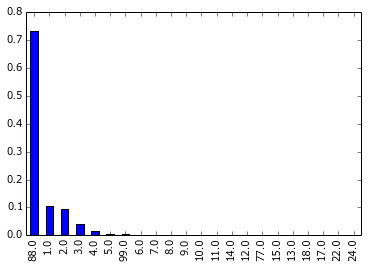

In [42]:
children.value_counts(normalize=True).plot(kind='bar')

A vast majority of respondents have no children

In [43]:
print "Average Sleep of People without Children:", sleptim[b['children'] == 88].mean()
print "   Average Sleep of People with Children:", sleptim[b['children'] != 88].mean()
print "    Average Sleep of People with 1 child:", sleptim[b['children'] == 1].mean()

Average Sleep of People without Children: 7.13123780297
   Average Sleep of People with Children: 6.88545500543
    Average Sleep of People with 1 child: 6.90149481769


Hmm, pretty big difference there, people with children get about 15 less minutes of sleep than people without.

In [44]:
print "          Average Sleep of Employed People:", sleptim[b['employ1'] == 1].mean()
print "     Average Sleep of Self-Employed People:", sleptim[b['employ1'] == 2].mean()
print "Average Sleep of Unemployed People for >yr:", sleptim[b['employ1'] == 3].mean()
print "Average Sleep of Unemployed People for <yr:", sleptim[b['employ1'] == 4].mean()
print "                 Average Sleep of Students:", sleptim[b['employ1'] == 6].mean()
print "           Average Sleep of Retired People:", sleptim[b['employ1'] == 7].mean()

          Average Sleep of Employed People: 6.89934131132
     Average Sleep of Self-Employed People: 7.09955974357
Average Sleep of Unemployed People for >yr: 6.92629482072
Average Sleep of Unemployed People for <yr: 7.00166026772
                 Average Sleep of Students: 7.10080350621
           Average Sleep of Retired People: 7.34556798591


Some unsurprising things here; retired people sleep a ton, students and employed people sleep less.  For some reason people sleep a lot in their first year of being unemployed, then sleep much less after that.

In [45]:
print "Average Sleep of People who make <10k:", sleptim[b['income2'] == 1].mean()
print "Average Sleep of People who make <15k:", sleptim[b['income2'] == 2].mean()
print "Average Sleep of People who make <20k:", sleptim[b['income2'] == 3].mean()
print "Average Sleep of People who make <25k:", sleptim[b['income2'] == 4].mean()
print "Average Sleep of People who make <35k:", sleptim[b['income2'] == 5].mean()
print "Average Sleep of People who make <50k:", sleptim[b['income2'] == 6].mean()
print "Average Sleep of People who make <75k:", sleptim[b['income2'] == 7].mean()
print "Average Sleep of People who make >75k:", sleptim[b['income2'] == 8].mean()

Average Sleep of People who make <10k: 6.89426070039
Average Sleep of People who make <15k: 6.95507777579
Average Sleep of People who make <20k: 7.01702951783
Average Sleep of People who make <25k: 7.05486849922
Average Sleep of People who make <35k: 7.09572041245
Average Sleep of People who make <50k: 7.0655378521
Average Sleep of People who make <75k: 7.06539082687
Average Sleep of People who make >75k: 7.06434265848


Not really a true linear relationship between income and sleep time.

In [46]:
print "  Average Sleep of Men:", sleptim[b['sex'] == 1].mean()
print "Average Sleep of Women:", sleptim[b['sex'] == 2].mean()

  Average Sleep of Men: 7.04353544033
Average Sleep of Women: 7.08118855587


Women get slightly more sleep than men.

In [47]:
print "   Average Sleep of people with health problems requiring equipment:", sleptim[b['useequip'] == 1].mean()
print "Average Sleep of people without health problems requiring equipment:", sleptim[b['useequip'] == 2].mean()

   Average Sleep of people with health problems requiring equipment: 7.02817847004
Average Sleep of people without health problems requiring equipment: 7.06955751034


"Special Equipment" is pretty broad, so this predictor might not be useful.

In [48]:
print "Average Sleep of People aged 18-24:", sleptim[b['x.ageg5yr'] == 1].mean()
print "Average Sleep of People aged 25-29:", sleptim[b['x.ageg5yr'] == 2].mean()
print "Average Sleep of People aged 30-34:", sleptim[b['x.ageg5yr'] == 3].mean()
print "Average Sleep of People aged 35-39:", sleptim[b['x.ageg5yr'] == 4].mean()
print "Average Sleep of People aged 40-44:", sleptim[b['x.ageg5yr'] == 5].mean()
print "Average Sleep of People aged 45-49:", sleptim[b['x.ageg5yr'] == 6].mean()
print "Average Sleep of People aged 50-54:", sleptim[b['x.ageg5yr'] == 7].mean()
print "Average Sleep of People aged 55-59:", sleptim[b['x.ageg5yr'] == 8].mean()
print "Average Sleep of People aged 60-64:", sleptim[b['x.ageg5yr'] == 9].mean()
print "Average Sleep of People aged 65-69:", sleptim[b['x.ageg5yr'] == 10].mean()
print "Average Sleep of People aged 70-74:", sleptim[b['x.ageg5yr'] == 11].mean()
print "Average Sleep of People aged 75-79:", sleptim[b['x.ageg5yr'] == 12].mean()
print "Average Sleep of People aged 80+:", sleptim[b['x.ageg5yr'] == 13].mean()

Average Sleep of People aged 18-24: 7.12667778241
Average Sleep of People aged 25-29: 6.9398187984
Average Sleep of People aged 30-34: 6.85942954449
Average Sleep of People aged 35-39: 6.86664553702
Average Sleep of People aged 40-44: 6.86630243215
Average Sleep of People aged 45-49: 6.8508006047
Average Sleep of People aged 50-54: 6.86883032222
Average Sleep of People aged 55-59: 6.92079693988
Average Sleep of People aged 60-64: 7.05109923899
Average Sleep of People aged 65-69: 7.203683337
Average Sleep of People aged 70-74: 7.29233574794
Average Sleep of People aged 75-79: 7.34674209093
Average Sleep of People aged 80+: 7.4877031651


Holy crap old people sleep 13 hours a day

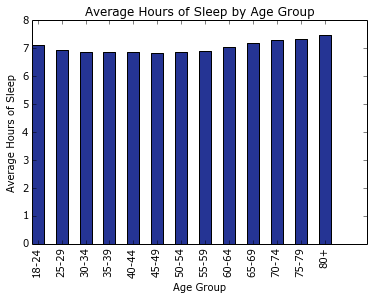

In [50]:
N = 13
means = (7.12667778241, 6.9398187984, 6.85942954449, 6.86664553702, 6.86630243215, 6.8508006047, 6.86883032222,
         6.92079693988, 7.05109923899, 7.203683337, 7.29233574794, 7.34674209093, 7.4877031651)

ind = np.arange(N)
width = .5
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
          '75-79', '80+']

fig, ax = plt.subplots()
rects1 = ax.bar(ind, means, width, color="#253494")

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Hours of Sleep')
ax.set_xlabel('Age Group')
ax.set_title('Average Hours of Sleep by Age Group')
plt.xticks(ind + (width/2), labels, rotation='vertical')

plt.show()

Looks like sleep goes down as you get older until about your late forties, then goes up.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

First iteration of a Random Forest:

In [14]:
predictors = ['marital', 'children', 'employ1', 'income2', 'weight2', 'height3', 'sex', 'useequip']

b = b.dropna(subset=['marital', 'children', 'employ1', 'income2', 'weight2', 'height3', 'sex', 'useequip'])

# Initialize our algorithm class
# alg = LinearRegression()
alg = RandomForestClassifier()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(b.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (b[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = b["sleptim1"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(b[predictors].iloc[test,:])
    predictions.append(test_predictions)
    
# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
# predictions[predictions > .5] = 1
# predictions[predictions <=.5] = 0
accuracy = sum(predictions[predictions == b["sleptim1"]]) / len(predictions)
print accuracy
from sklearn import cross_validation
# from sklearn.linear_model import LogisticRegression

# Initialize our algorithm
# alg = LogisticRegression(random_state=1)
alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)

# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, b[predictors], b["sleptim1"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print scores.mean()

6
0.291868126696


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
